# Chapter 7 Problem 5 (Gelman & Hill)

*Predictive simulation for linear regression: using data of interest to you, fit a linear regression model. Use the output from this model to simulate a predictive
distribution for observations with a particular combination of levels of all the predictors in the regression.*

We are going to use the [**Breast Cancer Wisconsin (Prognostic)**](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29) data set from UCI Machine Learning repository. Each record represents follow-up data for one breast cancer case. These are consecutive patients seen by Dr. Wolberg since 1984, and include only those cases exhibiting invasive breast cancer and no evidence of distant metastases at the time of diagnosis. 

The first 30 features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

The separation described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: 
[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

The Recurrence Surface Approximation (RSA) method is a linear programming model which predicts Time To Recur using both recurrent and nonrecurrent cases. See references (i) and (ii) above for details of the RSA method. 

In [12]:
library(foreign)
library(arm)
library(ggplot2)

In [13]:
breast <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data",
                    sep=",")
colNames <- c("id", "outcome", "time", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
              "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
             "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", 
              "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
             "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", 
              "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst",
             "tumor_size", "lymph_node_status")
X <- breast[, c(-1, -2, -3)]
breast <- cbind(breast[, c(1, 2, 3)], sapply(X,  function(x) (x - mean(x, na.rm=TRUE)) / (2 * sd(x, na.rm=TRUE))))
colnames(breast) <- colNames
head(breast)

Warning message:
In mean.default(x, na.rm = TRUE): argument is not numeric or logical: returning NAWarning message:
In Ops.factor(x, mean(x, na.rm = TRUE)): ‘-’ not meaningful for factors

,id,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,ellip.h,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
1,119513,N,31,0.09610043,0.6193149,0.06181043,0.06099558,-0.3110983,-0.3912791,-0.3375461,⋯,-0.01121022,0.02648553,-0.5549173,-0.5260324,-0.3533063,-0.6836744,-0.3705653,-0.2290323,0.5553574,NA
2,8423,N,61,0.09135611,-1.383807,0.1857383,0.04395735,0.6276172,1.352292,1.019219,⋯,0.765814,0.5239199,0.4153625,0.9163485,0.792557,0.9586264,0.9093556,0.6629489,0.03935193,NA
3,842517,N,116,0.6258828,-0.5625505,0.5294629,0.5721425,-0.5718304,-0.2379651,-0.2178106,⋯,0.3245196,0.4641936,-0.5708235,-0.06160405,-0.2744004,0.2702766,0.7317367,-0.00373445,-0.08964944,NA
4,843483,N,123,-0.9476499,-0.220554,-0.8716239,-0.8291101,1.58989,1.415421,0.6033335,⋯,-0.7178004,-0.714376,1.496986,1.528369,0.7205626,0.8711994,2.264449,1.940582,-0.2186508,NA
5,843584,R,27,0.4550873,-0.923159,0.4733446,0.4642337,-0.09508593,-0.09867987,0.2958473,⋯,0.2051105,0.1450848,-0.1481723,-0.4882194,-0.1056455,-0.1801388,-0.5787853,-0.3317625,0.1683533,NA
6,843786,R,77,-0.7373184,-0.81265,-0.7074778,-0.6635552,0.6475813,0.1428147,0.07196328,⋯,-0.5719137,-0.573166,0.6062372,0.1661884,0.470022,-0.08717835,0.1669483,0.6393328,-0.08964944,NA


In [14]:
m1 <- lm(time ~ radius_mean + texture_mean + fractal_dimension_mean, data=breast)
display(m1)

lm(formula = time ~ radius_mean + texture_mean + fractal_dimension_mean, 
    data = breast)
                       coef.est coef.se
(Intercept)             46.73     2.23 
radius_mean            -17.93     4.95 
texture_mean           -14.35     4.55 
fractal_dimension_mean   9.05     4.95 
---
n = 198, k = 4
residual sd = 31.44, R-Squared = 0.18


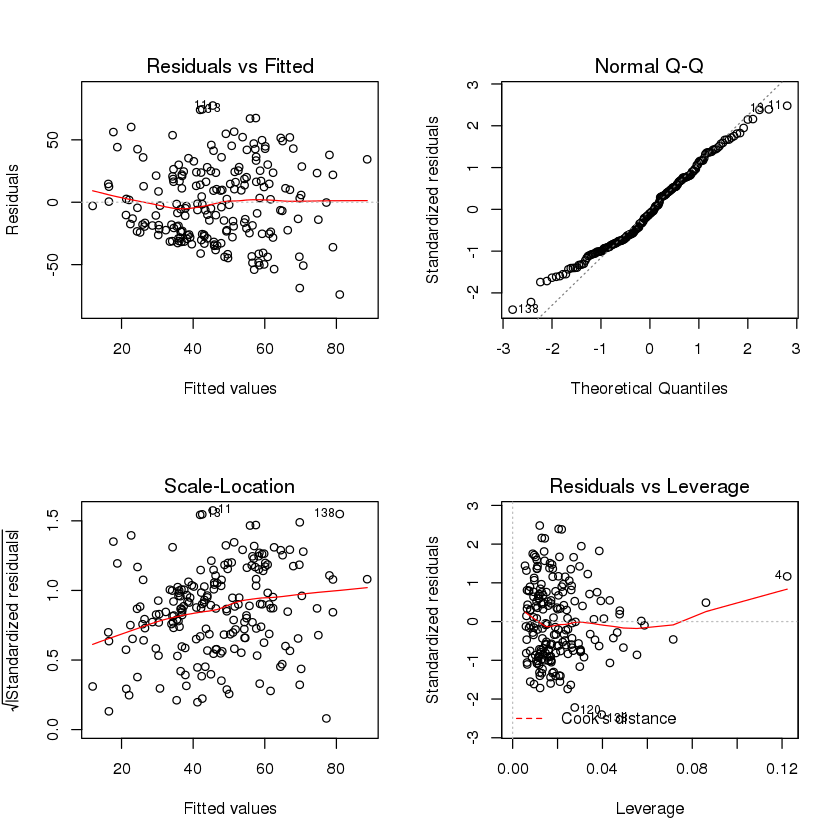

In [15]:
par(mfrow=c(2,2))
plot(m1)

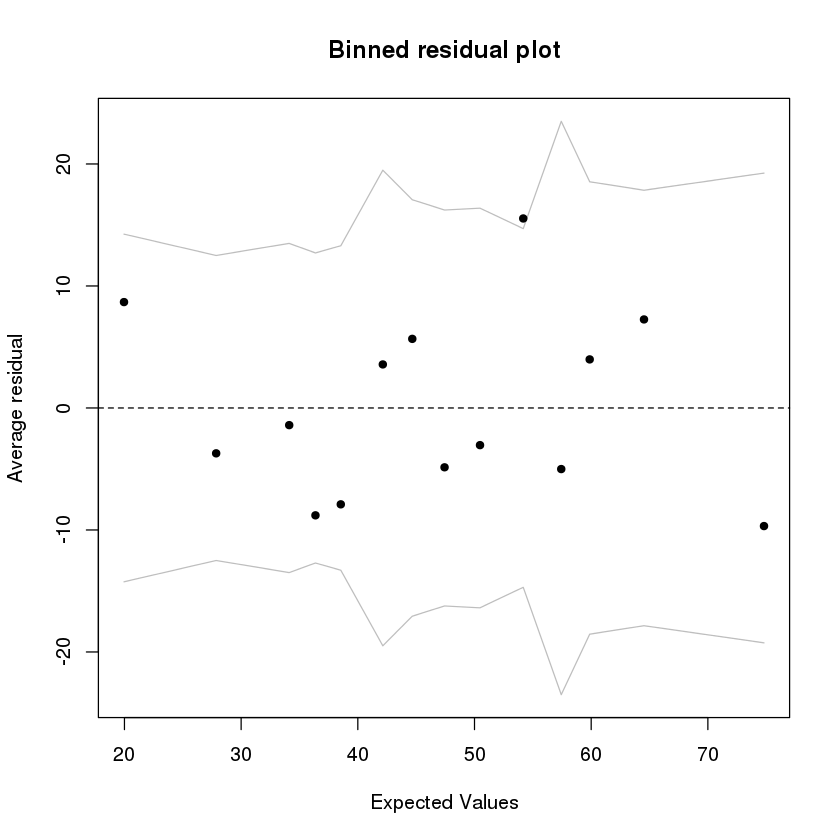

In [16]:
binnedplot(predict(m1), residuals(m1))

In [17]:
m2 <- lm(time ~ radius_mean + texture_mean + fractal_dimension_mean + texture_se, data=breast)
display(m2)

lm(formula = time ~ radius_mean + texture_mean + fractal_dimension_mean + 
    texture_se, data = breast)
                       coef.est coef.se
(Intercept)             46.73     2.21 
radius_mean            -17.20     4.91 
texture_mean           -10.15     4.88 
fractal_dimension_mean  10.18     4.93 
texture_se             -10.83     4.83 
---
n = 198, k = 5
residual sd = 31.12, R-Squared = 0.20


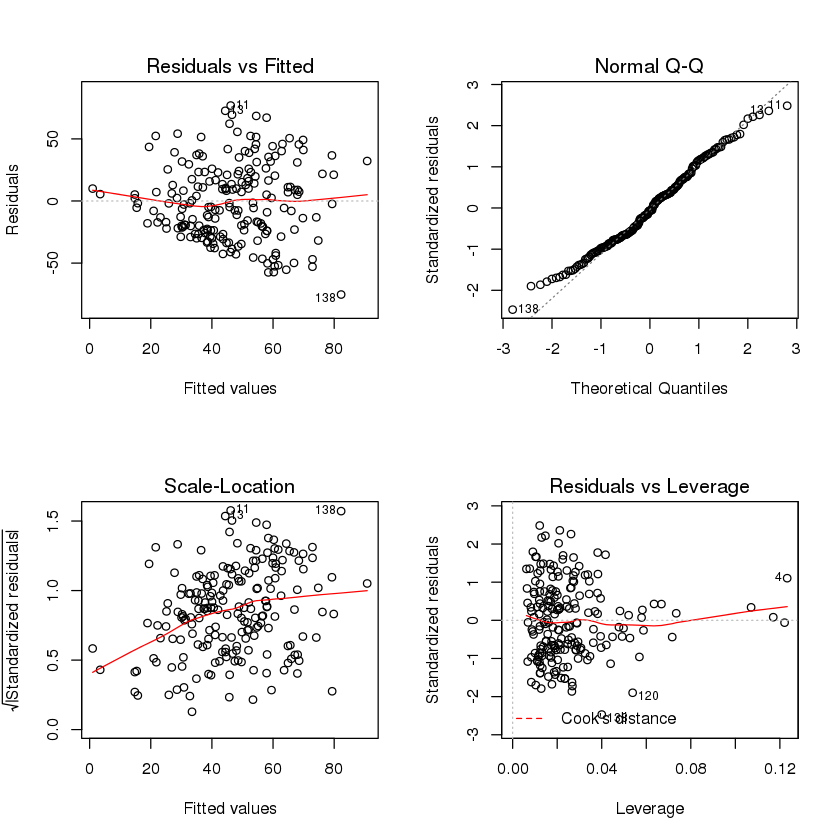

In [18]:
par(mfrow=c(2,2))
plot(m2)

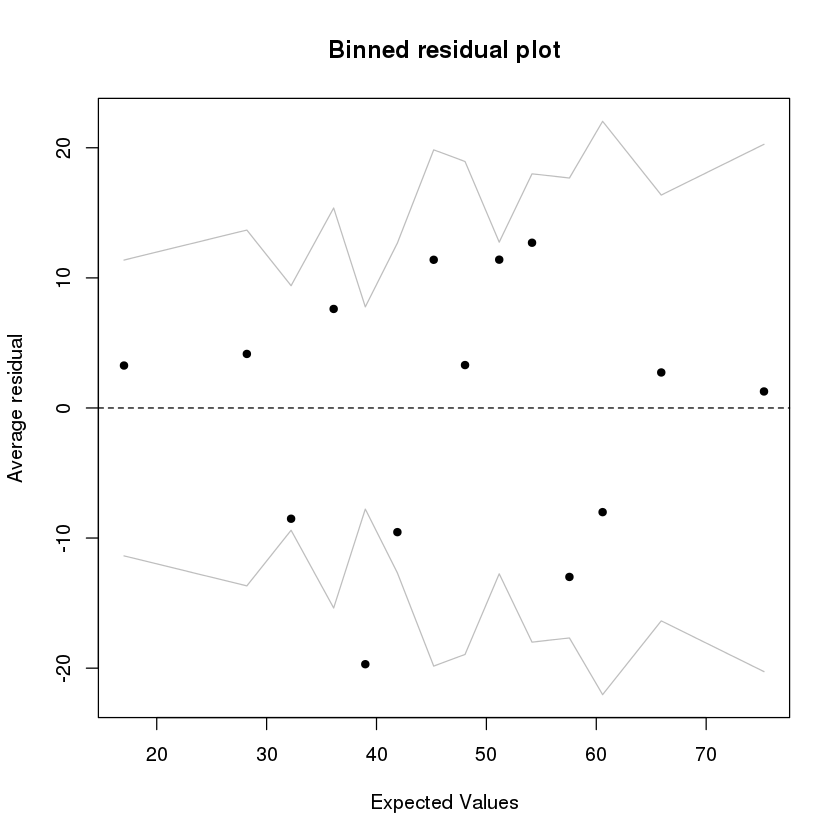

In [19]:
binnedplot(x = predict(m2), residuals(m2))

We prefer the first version of our model because the residuals present less heteroschedasticity. 

Although we didn't show any model with "worst" or largest (mean of the three largest values) features, we did try to fit such models. However, none of those models improved on the models we decide to publish here. We also tried to add interactions between the predictors of the final model specification, but again the predictors didn't show any significance.

Now that we have a model, we need to simulate outcomes for patients with a certain combination of levels of all the predictors in the regression. The final model includes only three predictors: `radius_mean`, `texture_mean` and `fractal_dimension_mean`. To begin, we will try to simulate the outcome for patients with all three predictors hold at their average value.

In [20]:
# compute average value on training set
radius_avg <- mean(breast$radius_mean)
texture_avg <- mean(breast$texture_mean)
fractal_dimension_avg <- mean(breast$fractal_dimension_mean)

Before moving on, we should notice that, because our predictors have been centered and scaled, their average point is extremely close to zero. Thus, on our first attempt we will basically produce a predictive distribution of the intercept term, with little influence from the predictors coefficients and standard errors.

[1] 1.208841e-16

[1] -2.466177e-17

[1] -1.953747e-16

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


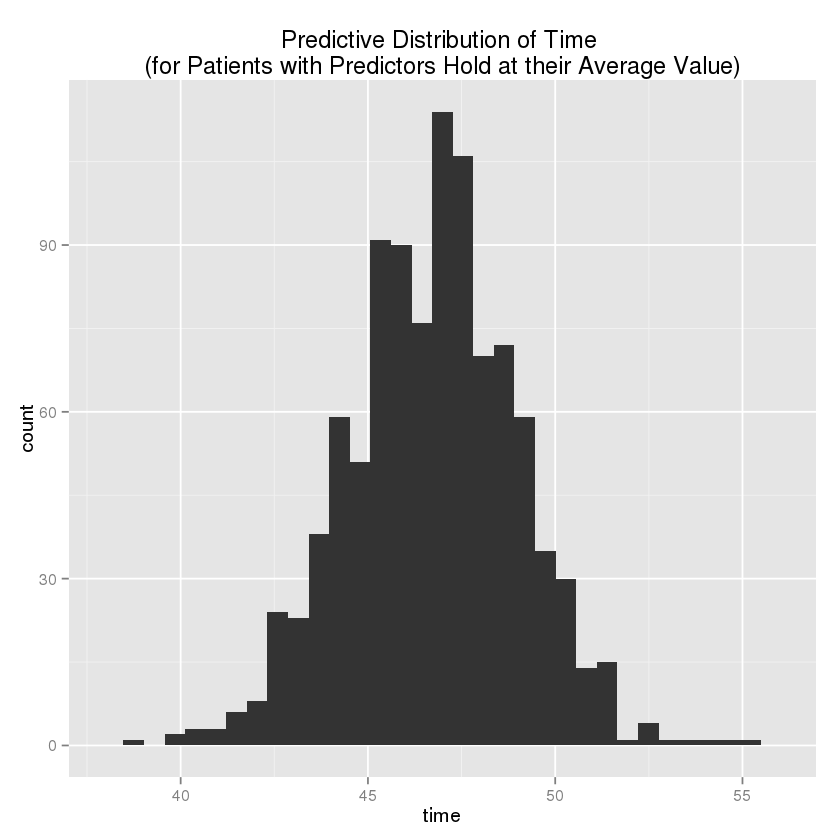

In [21]:
# check the average of our predictors of choice is zero
radius_avg
texture_avg
fractal_dimension_avg

# simulate 1,000 new outcomes based on our final model
new.obs <- sim(m1, n=1000)

# use the 1,000 simulated observations for the intercept, betas and error term to create the predictive 
#   distribution for observations with a particular combination of levels of all the predictors in the regression
sim.outcome <- coef(new.obs)[,1] + radius_avg * coef(new.obs)[,2] + 
                texture_avg * coef(new.obs)[,3] + fractal_dimension_avg * coef(new.obs)[,4]
ggplot(data=data.frame(x=sim.outcome), aes(x=x)) + geom_histogram() + 
    labs(x="time", title="Predictive Distribution of Time \n(for Patients with Predictors Hold at their Average Value)")

We can now simulate the outcome for patients with a particular other set of predictors. For instance, we might be interested on checking the influence of a larger radius when all other predictors are maintained at their average value. 

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.
stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


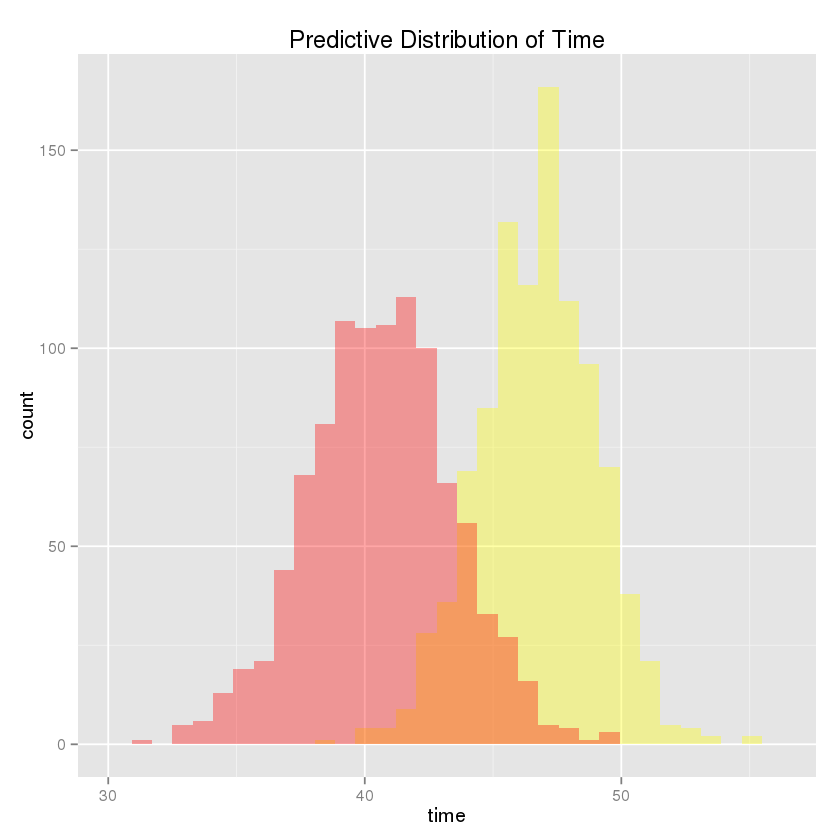

In [22]:
sim.outcome2 <- coef(new.obs)[,1] + (quantile(breast$radius_mean, .75)) * coef(new.obs)[,2] + 
                texture_avg * coef(new.obs)[,3] + fractal_dimension_avg * coef(new.obs)[,4]
ggplot(data=data.frame(x1=sim.outcome, x2=sim.outcome2)) + 
    geom_histogram(aes(x=x1), fill="yellow", alpha=.35) + 
    geom_histogram(aes(x=x2), fill="red", alpha=.35) + 
    labs(x="time", title="Predictive Distribution of Time")